In [1]:
import os,pandas as pd, numpy as np
import scipy.stats as sp
import sklearn as sk
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import savefig

In [2]:
sns.set(style='white')

In [3]:
source_dir = os.path.join('..','derivatives','0.4.joined')

In [4]:
data = pd.read_csv(os.path.join(source_dir,'all_subject_level.csv'))
data['Condition'] = data['Condition'].replace({1:'Annotated',2:'Video',3:'Original'})
data['AgeGroup'] = data['AgeGroup'].replace({1:'YA',2:'OA'})
data['Gender'] = data['Gender'] - 1
data['nb_CoR'] = data['nb_CoR']*100
data[['SciEdu_HS','SciEdu_UGrad','SciEdu_Grad']] = data[['SciEdu_HS','SciEdu_UGrad','SciEdu_Grad']].replace({np.nan:0})
data.head()

,sub,Condition,Age,Gender,EduYears,SciEdu_HS,SciEdu_UGrad,SciEdu_Grad,AgeGroup,comp_t1,...,TSSI_sum,vocab_sum,SciLit_sum,SciTude_sum,O1_sum,O2_sum,O3_sum,O4_sum,O5_sum,O6_sum
0,101,Annotated,20.0,1.0,14,4,7,0.0,YA,9.0,...,87,30.0,16,70,9.0,14.0,11.0,11.0,10.0,15.0
1,102,Video,19.0,1.0,12,3,3,0.0,YA,10.0,...,83,26.0,16,69,17.0,13.0,14.0,17.0,15.0,13.0
2,103,Original,18.0,0.0,12,3,0,0.0,YA,7.0,...,76,28.0,15,61,16.0,13.0,12.0,16.0,9.0,12.0
3,104,Annotated,18.0,0.0,12,4,0,0.0,YA,9.0,...,97,28.0,16,77,17.0,13.0,12.0,14.0,11.0,11.0
4,105,Video,18.0,0.0,12,6,0,0.0,YA,8.0,...,82,28.0,15,62,17.0,9.0,18.0,14.0,12.0,11.0


# Demographics

In [5]:
grp_idx = ['AgeGroup','Condition']
mean_vars = ['Age','Gender','comp_change','comp_t1','comp_t2']
df = data.groupby(grp_idx).count()[['sub']].merge(
    data.groupby(grp_idx).mean()[mean_vars],on=grp_idx)
df

sub        Age    Gender  comp_change    comp_t1  \
AgeGroup Condition                                                     
OA       Annotated    7  71.000000  0.571429     1.571429  12.571429   
         Original     8  71.800000  0.875000     3.625000  11.000000   
         Video        7  74.285714  0.857143     4.000000  10.142857   
YA       Annotated   17  20.176471  0.764706     2.411765  10.117647   
         Original    19  18.722222  0.473684     3.894737   9.736842   
         Video       19  20.842105  0.631579     3.842105   9.631579   

                      comp_t2  
AgeGroup Condition             
OA       Annotated  14.142857  
         Original   14.625000  
         Video      14.142857  
YA       Annotated  12.529412  
         Original   13.631579  
         Video      13.473684

# Group comparisons

In [6]:
vars_of_interest = ['comp_t1','comp_t2','comp_change','nb_CoR','nb_RT',
                    'procspd_RT','NFCS_sum','TSSI_sum',
                    'vocab_sum','SciLit_sum','SciTude_sum']

In [7]:
grps_of_interest = ['Condition','AgeGroup',['AgeGroup','Condition']]

# Correlations
We need to drop all missing data listwise. SPSS does this pairwise for the correlations, but I'm not sure how exactly to replicate that. If we find a way to, I would prefer not to destroy data unnecessarily here.

In [8]:
data = data.dropna()

## Correlation Matrices

Define functions to create the correlation & significance tables and matrices

In [9]:
def corr_table(df):
    corr_df = pd.DataFrame()
    for c in vars_of_interest:
        for d in vars_of_interest:
            corr_df.loc[c,d] = sp.pearsonr(df[c],df[d])[0]
    return(corr_df)

def sig_table(df):
    sig_df = pd.DataFrame()
    for c in vars_of_interest:
        for d in vars_of_interest:
            sig_df.loc[c,d] = sp.pearsonr(df[c],df[d])[1]
    return(sig_df)

In [10]:
def matrix_mask(df):
    mask = np.zeros_like(df)
    mask[np.triu_indices_from(mask)] = True
    plt.figure(figsize=(16,5))
    return(mask)

In [11]:
def correlation_matrix(df,title):
    mask = matrix_mask(df)
    fig = sns.heatmap(df, mask=mask, annot=True, cmap='Spectral',
                      fmt='.3f', linewidths=1, center=0)
    fig.set_title(title+'\nCorrelation Coefficients')
    return(fig)

def significance_matrix(df,title):
    mask = matrix_mask(df)
    myColors = (
        (0.4, 0.0, 0.0, 1.00),(0.6, 0.0, 0.0, 0.85),(0.8, 0.0, 0.0, 0.70),(1.0, 0.0, 0.0, 0.55),
        (1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),
        (1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),
        (1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),
        (1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),
    )
    cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
    fig = sns.heatmap(df, mask=mask, annot=True, cmap=cmap,
                fmt='.3f', linewidths=1, center=0.5
               )
    fig.set_title(title+'\nCorrelation Significance')
    return(fig)

### All AgeGroups,Conditions

In [12]:
corr_df = corr_table(data)
sig_df = sig_table(data)

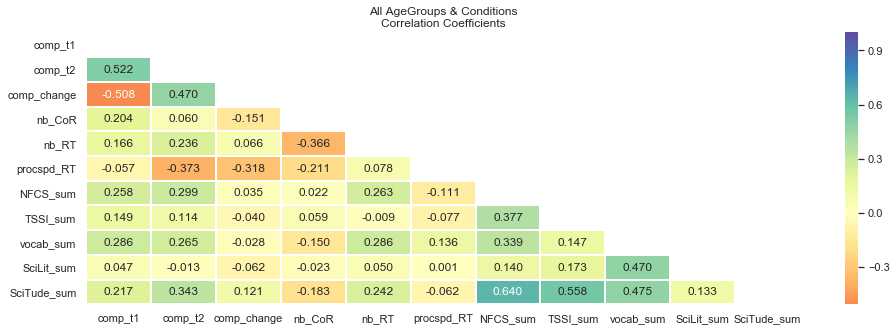

In [13]:
fpath = os.path.join('..','derivatives','figures','allgroups_correlations.png')
fig = correlation_matrix(corr_df,'All AgeGroups & Conditions')
fig.get_figure().savefig(fpath)

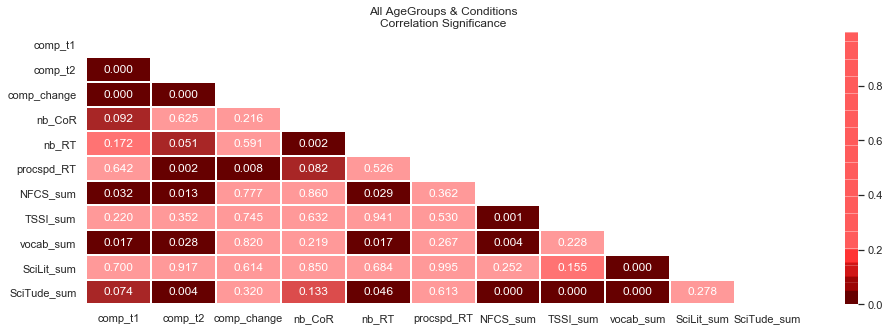

In [14]:
fpath = os.path.join('..','derivatives','figures','allgroups_significance.png')
fig = significance_matrix(sig_df,'All AgeGroups & Conditions')
fig.get_figure().savefig(fpath)

### By AgeGroup

In [15]:
ya_data = data[data['AgeGroup'] == 'YA']
oa_data = data[data['AgeGroup'] == 'OA']

In [16]:
ya_corr_df = corr_table(ya_data)
ya_sig_df = sig_table(ya_data)
oa_corr_df = corr_table(oa_data)
oa_sig_df = sig_table(oa_data)

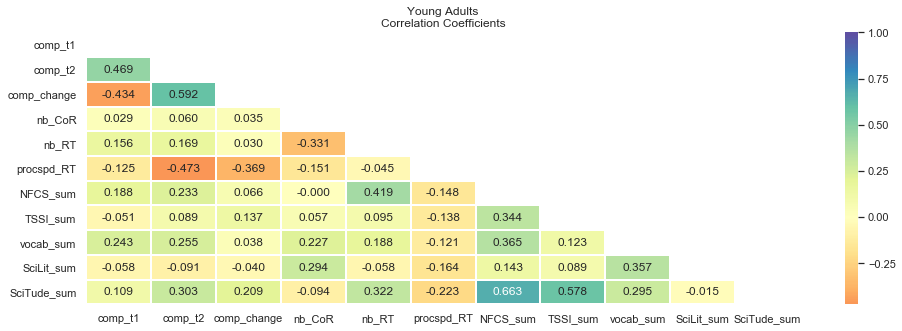

In [17]:
fig = correlation_matrix(ya_corr_df,'Young Adults')
fpath = os.path.join('..','derivatives','figures','ya_correlations.png')
fig.get_figure().savefig(fpath)

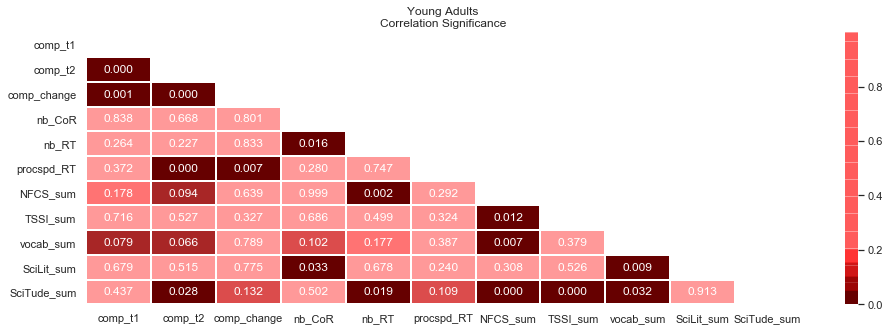

In [18]:
significance_matrix(ya_sig_df,'Young Adults')
fpath = os.path.join('..','derivatives','figures','ya_significance.png')
fig.get_figure().savefig(fpath)

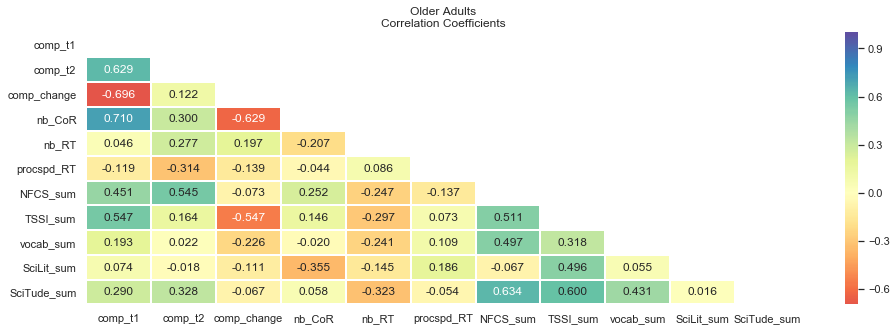

In [19]:
correlation_matrix(oa_corr_df,'Older Adults')
fpath = os.path.join('..','derivatives','figures','oa_correlations.png')
fig.get_figure().savefig(fpath)

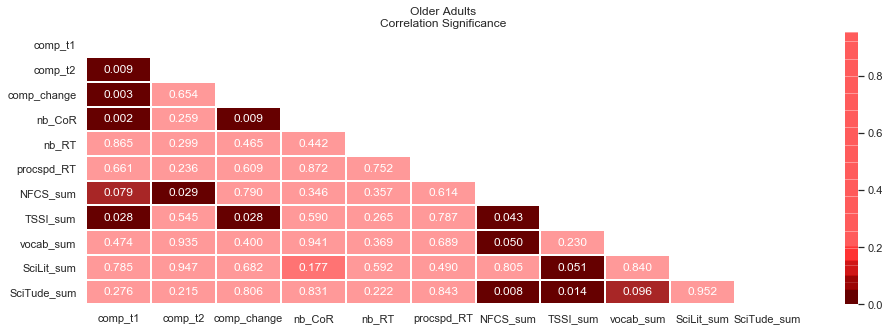

In [20]:
significance_matrix(oa_sig_df,'Older Adults')
fpath = os.path.join('..','derivatives','figures','oa_significance.png')
fig.get_figure().savefig(fpath)

### By Condition

In [21]:
annotated_data = data[data['Condition'] == 'Annotated']
original_data = data[data['Condition'] == 'Original']
video_data = data[data['Condition'] == 'Video']

In [22]:
annotated_corr_df = corr_table(annotated_data)
annotated_sig_df = sig_table(annotated_data)

original_corr_df = corr_table(original_data)
original_sig_df = sig_table(original_data)

video_corr_df = corr_table(video_data)
video_sig_df = sig_table(video_data)

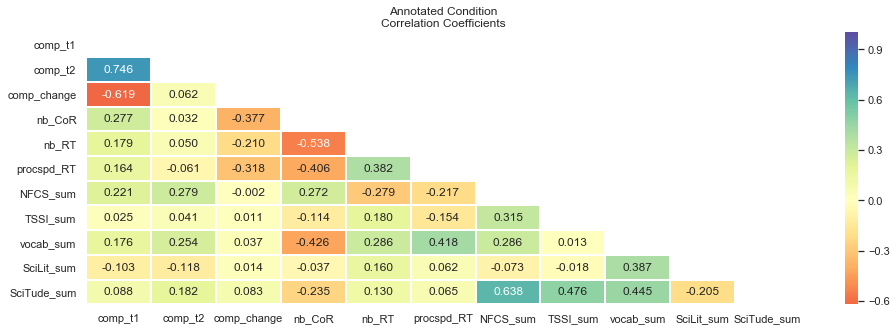

In [23]:
correlation_matrix(annotated_corr_df,'Annotated Condition')
fpath = os.path.join('..','derivatives','figures','annot_correlations.png')
fig.get_figure().savefig(fpath)

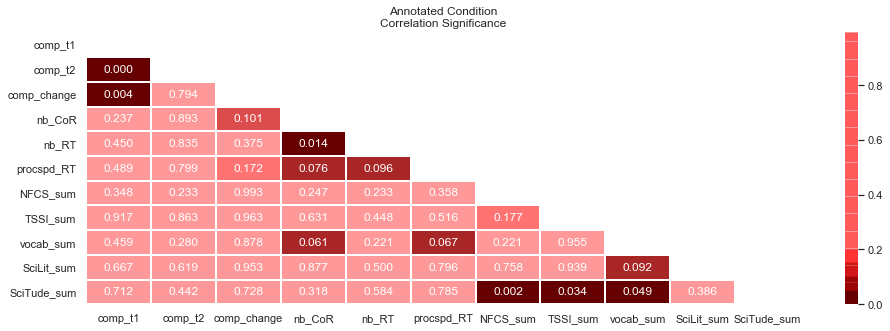

In [24]:
significance_matrix(annotated_sig_df,'Annotated Condition')
fpath = os.path.join('..','derivatives','figures','annot_significance.png')
fig.get_figure().savefig(fpath)

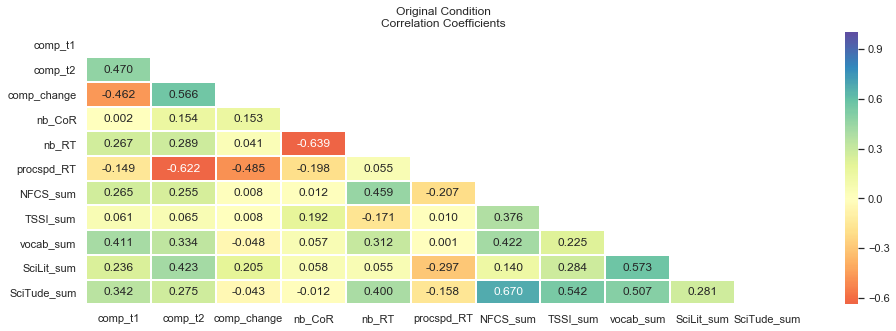

In [25]:
correlation_matrix(original_corr_df,'Original Condition')
fpath = os.path.join('..','derivatives','figures','orig_correlations.png')
fig.get_figure().savefig(fpath)

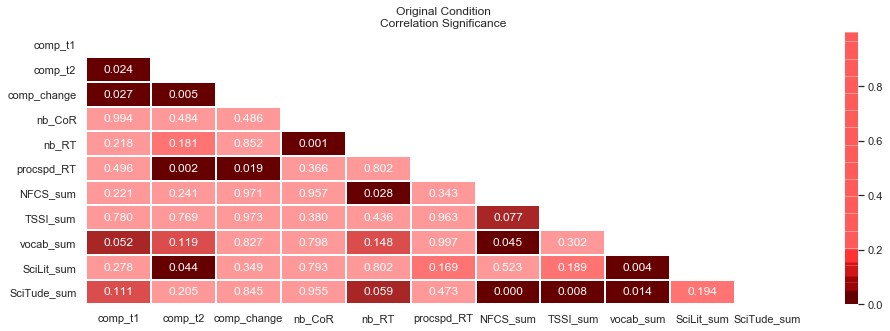

In [26]:
significance_matrix(original_sig_df,'Original Condition')
fpath = os.path.join('..','derivatives','figures','orig_significance.png')
fig.get_figure().savefig(fpath)

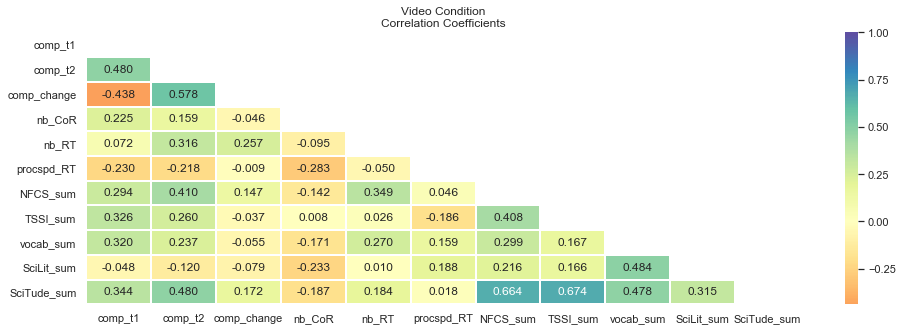

In [27]:
correlation_matrix(video_corr_df,'Video Condition')
fpath = os.path.join('..','derivatives','figures','video_correlations.png')
fig.get_figure().savefig(fpath)

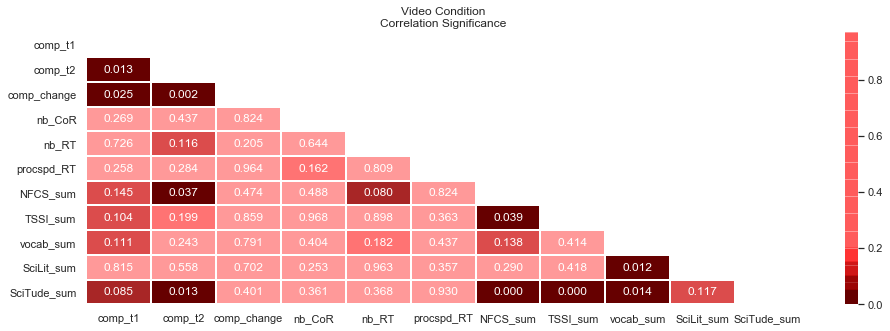

In [28]:
significance_matrix(video_sig_df,'Video Condition')
fpath = os.path.join('..','derivatives','figures','video_significance.png')
fig.get_figure().savefig(fpath)

## Correlograms

<Figure size 1152x360 with 0 Axes>

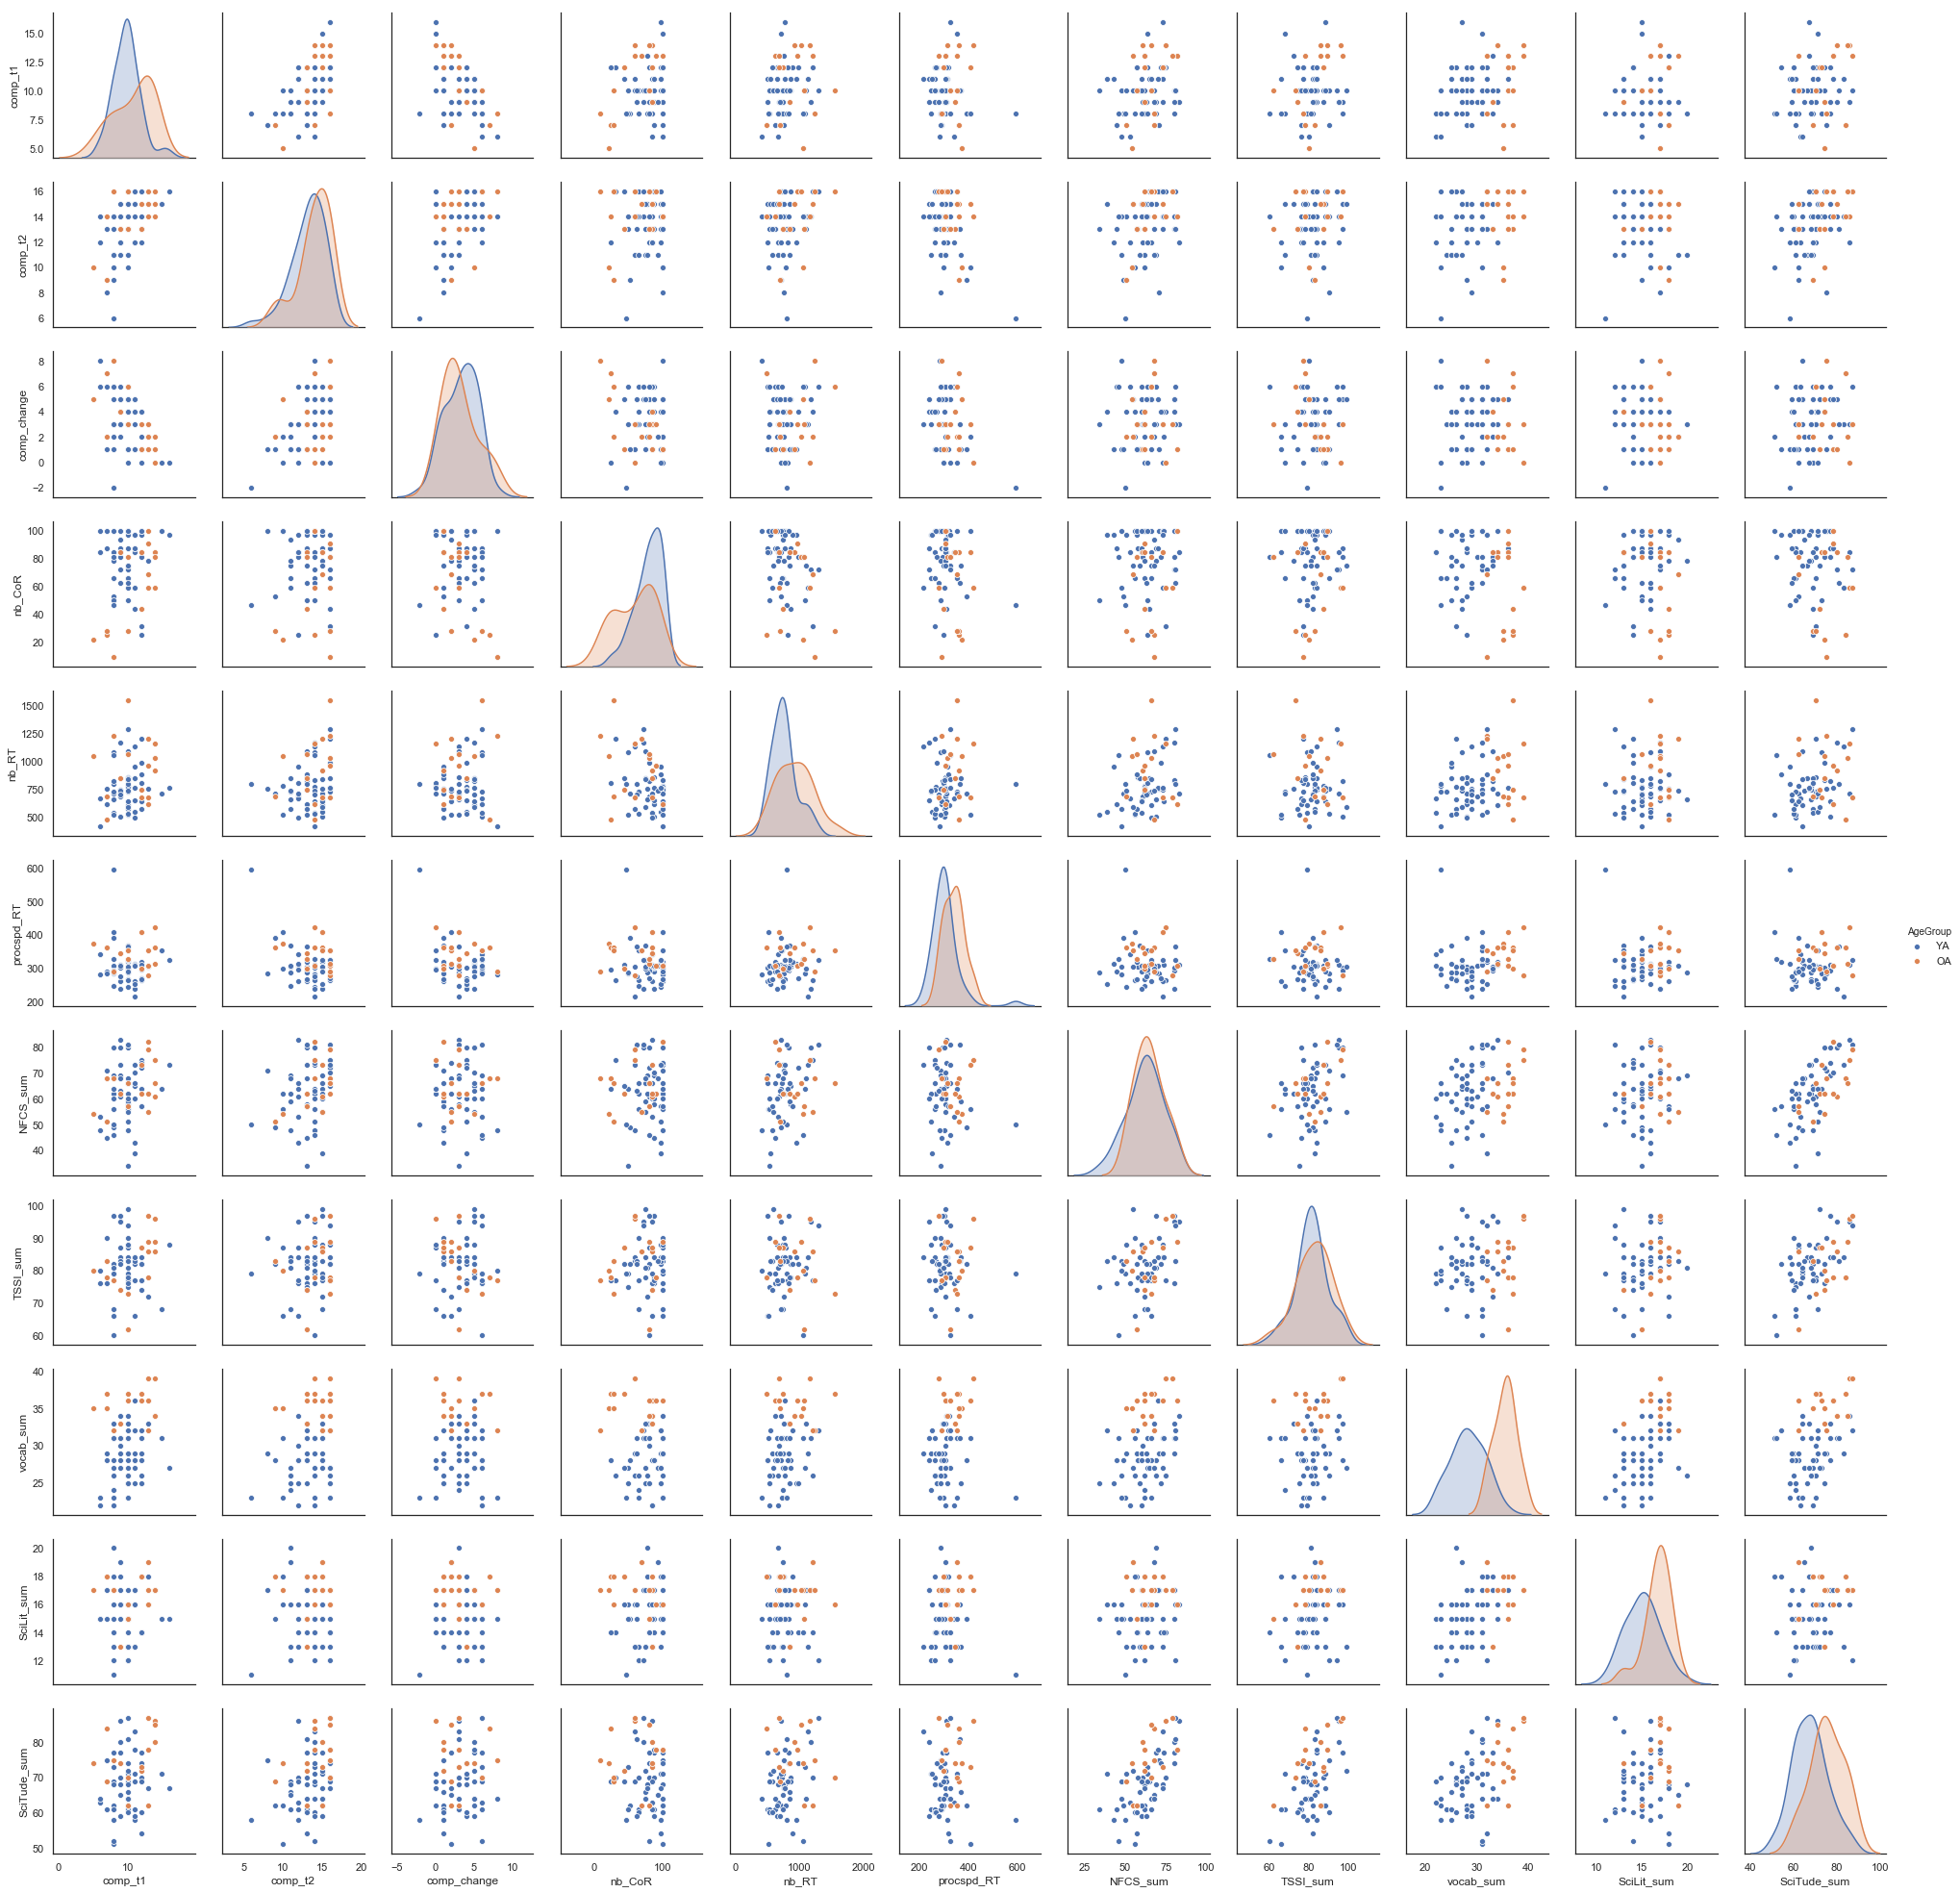

In [29]:
fpath = os.path.join('..','derivatives','figures','AgeGroup_correlogram.png')
plt.figure(figsize=(16,5))
df = data[vars_of_interest+['AgeGroup','Condition']]
fig = sns.pairplot(df,hue='AgeGroup')
# for i,j in zip(*np.triu_indices_from(fig.axes, 1)):
#     fig.axes[i, j].set_visible(False)
fig.savefig(fpath)

<Figure size 1152x360 with 0 Axes>

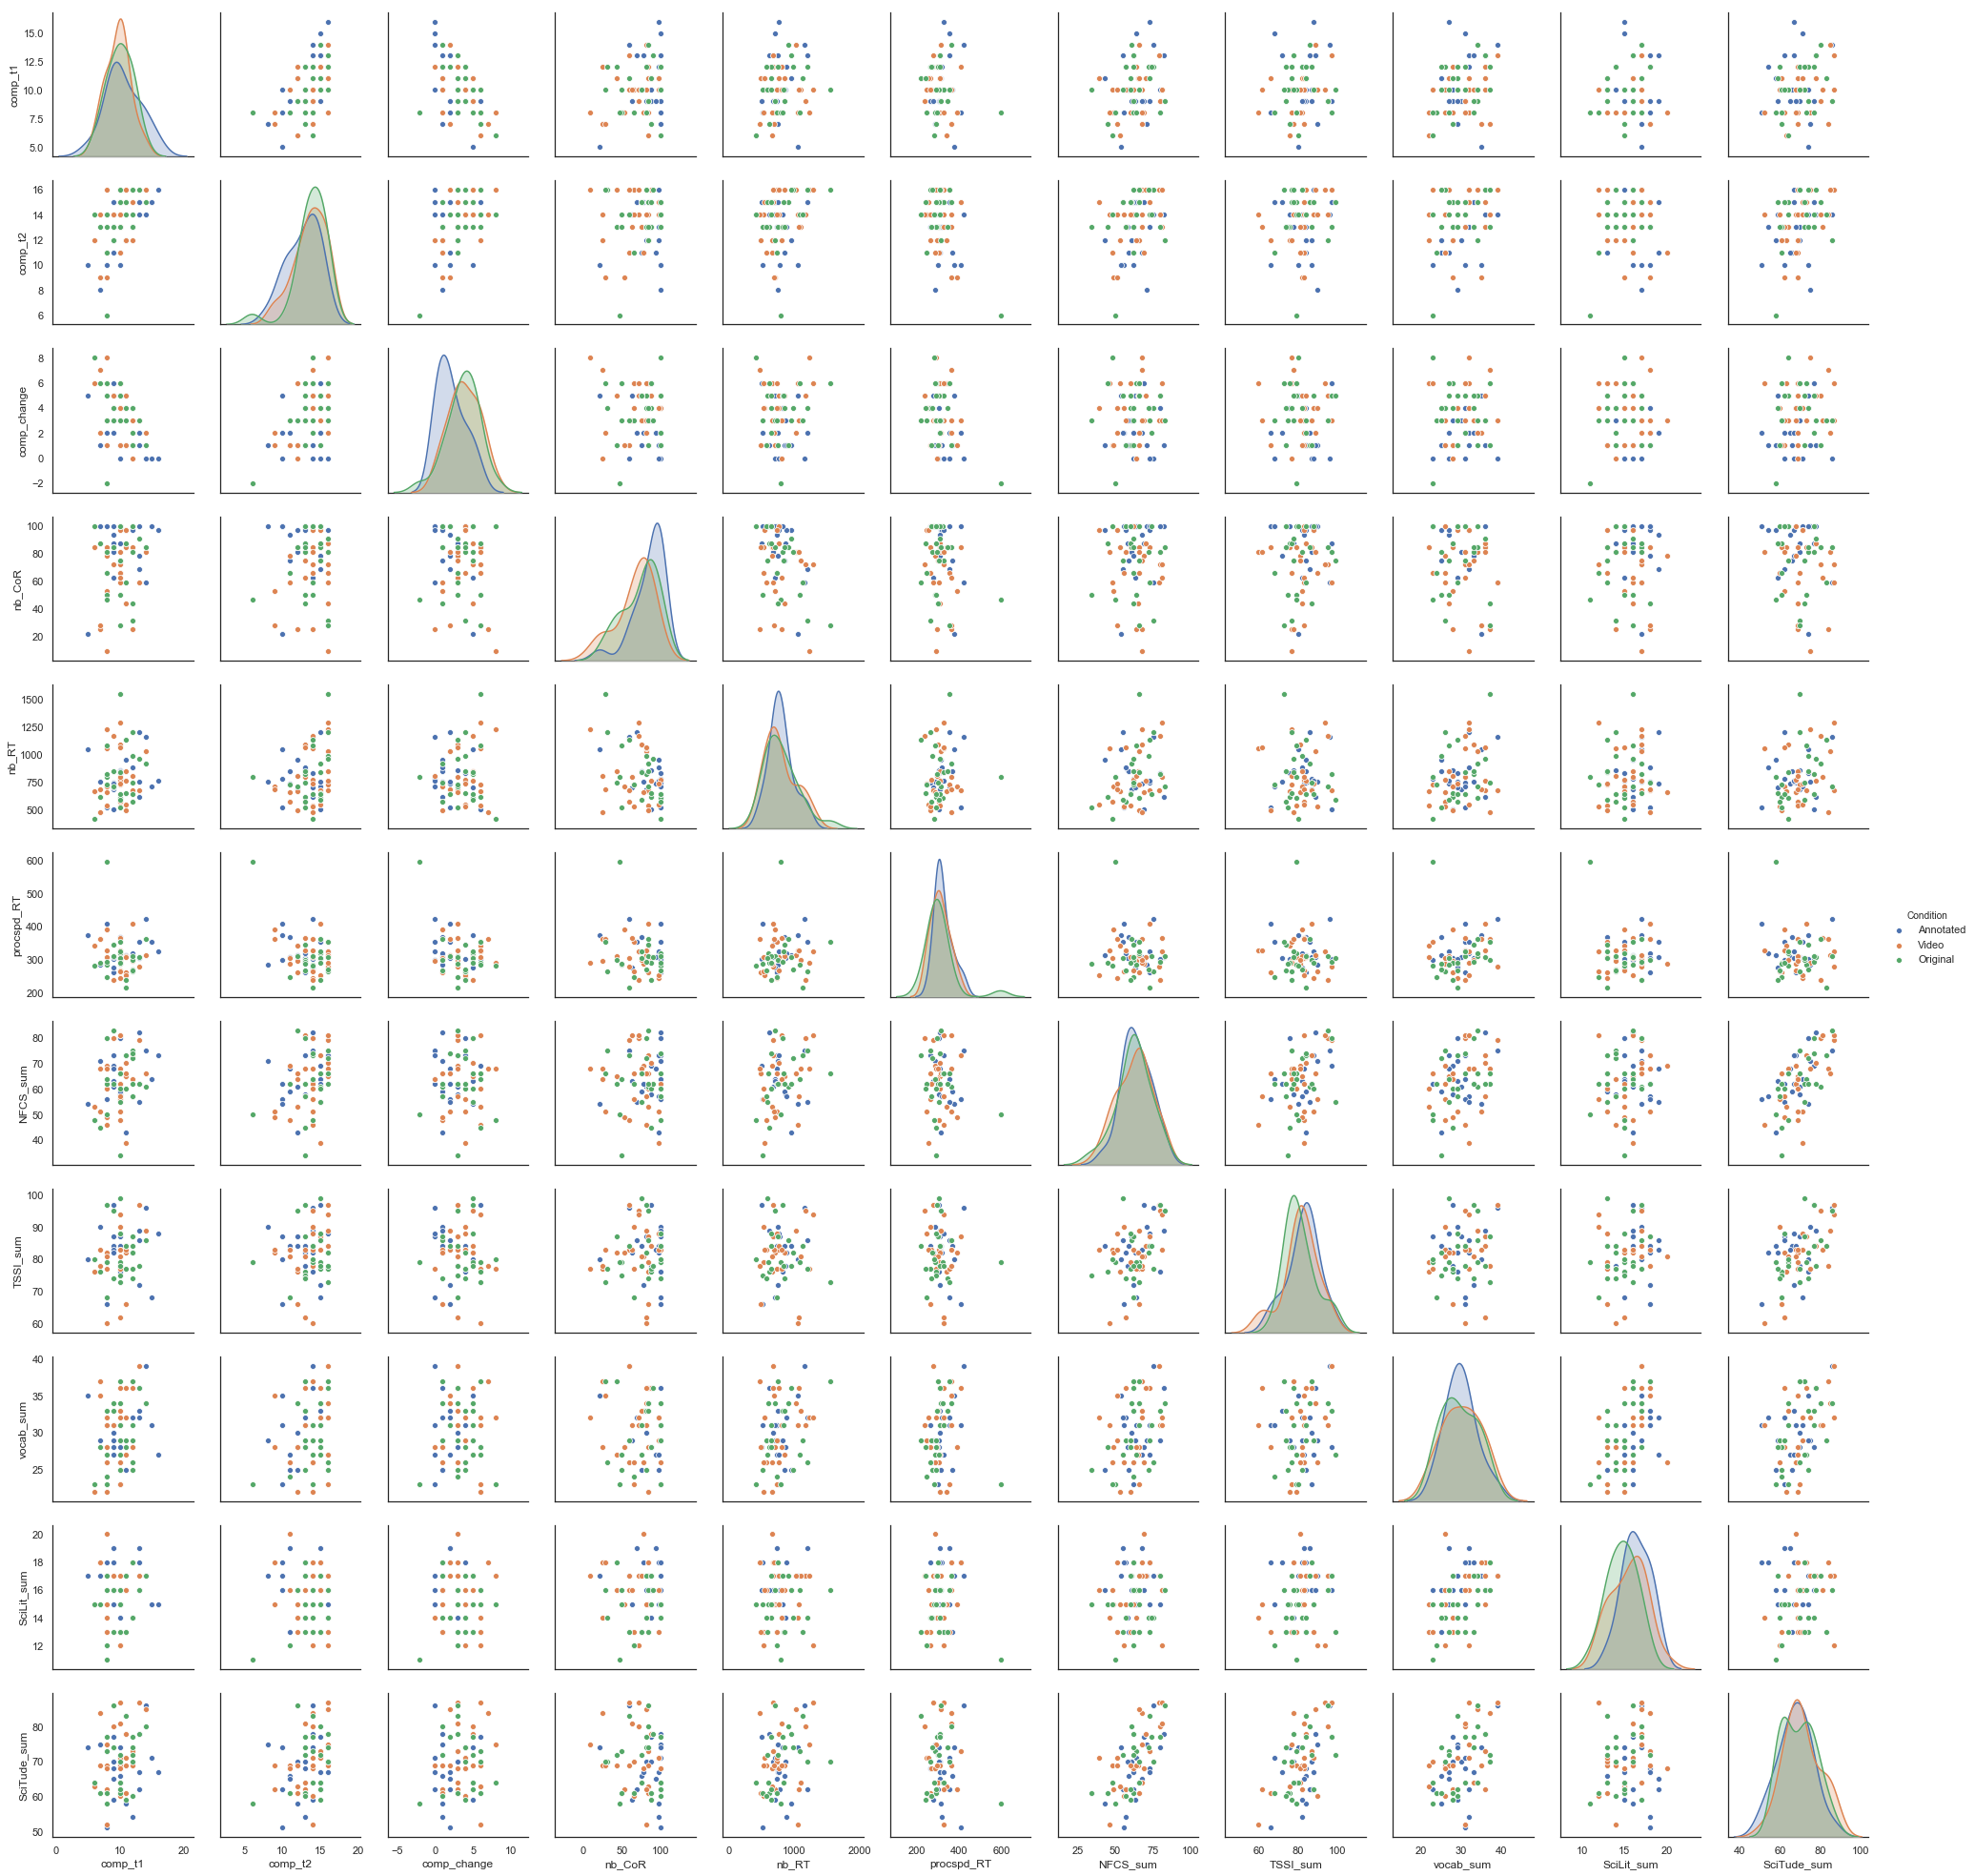

In [30]:
fpath = os.path.join('..','derivatives','figures','Condition_correlogram.png')
plt.figure(figsize=(16,5))
df = data[vars_of_interest+['AgeGroup','Condition']]
fig = sns.pairplot(df,hue='Condition')
# for i,j in zip(*np.triu_indices_from(fig.axes, 1)):
#     fig.axes[i, j].set_visible(False)
fig.savefig(fpath)

# Vertical Bar plots

c:\users\ia406477\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


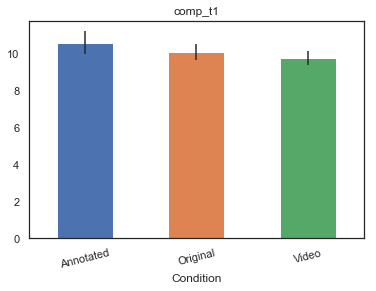

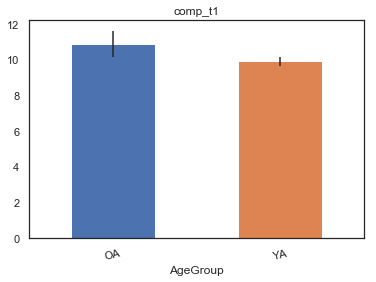

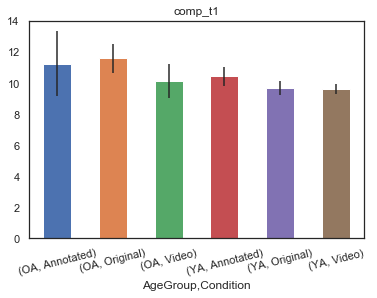

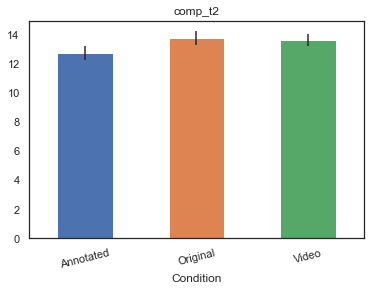

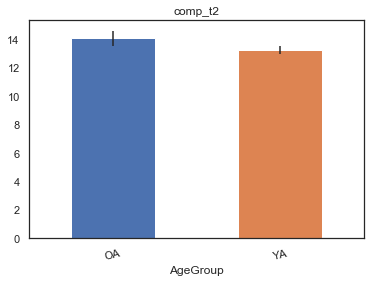

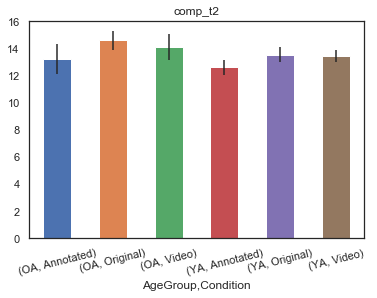

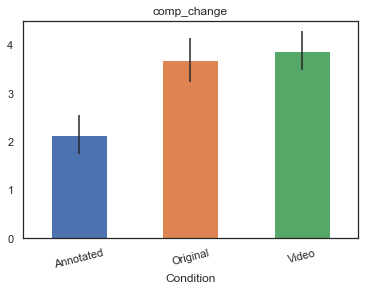

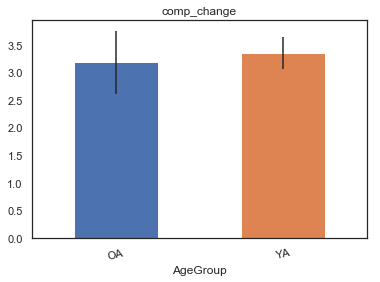

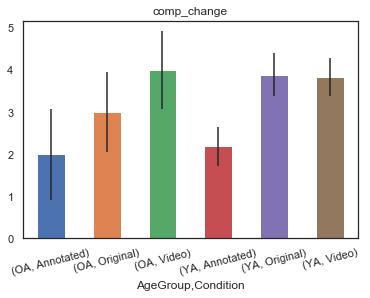

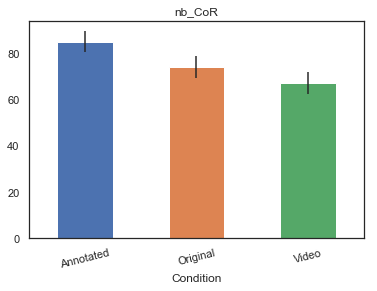

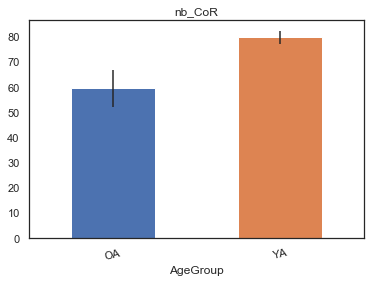

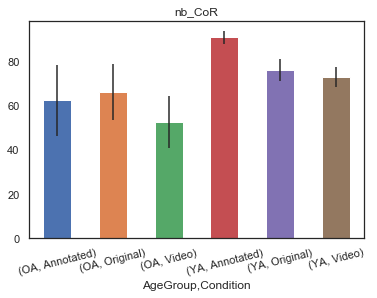

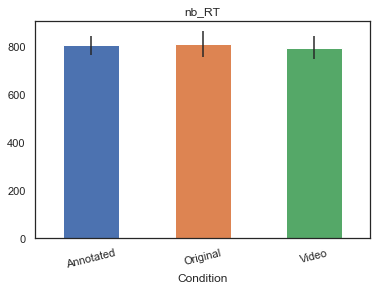

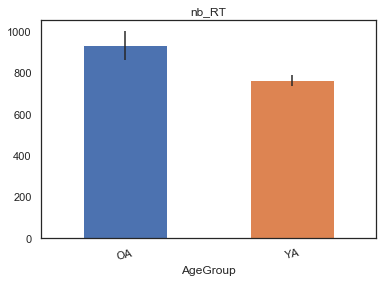

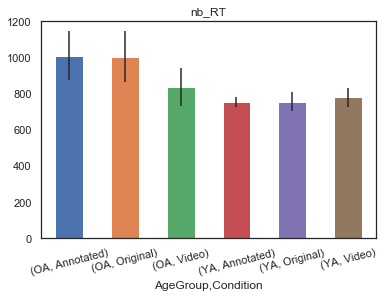

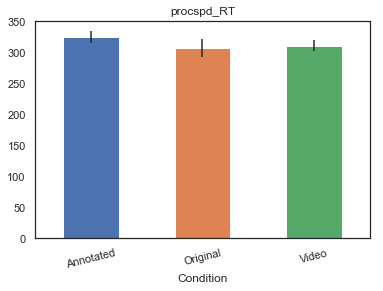

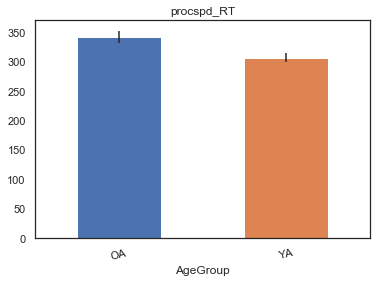

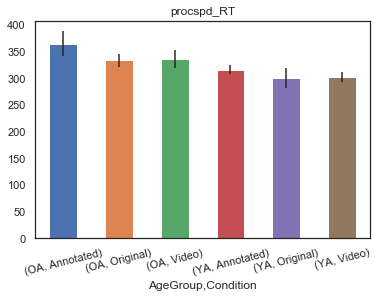

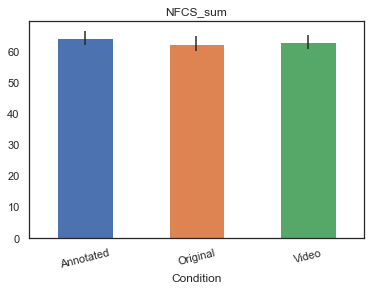

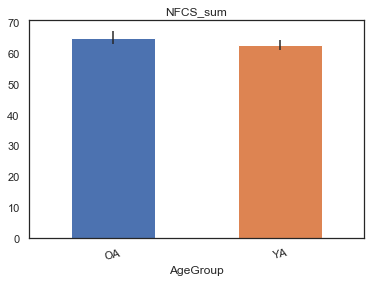

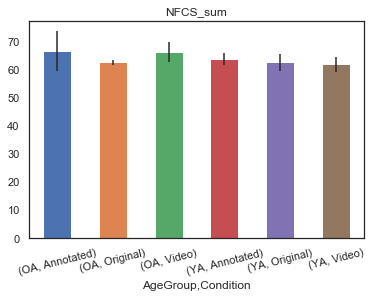

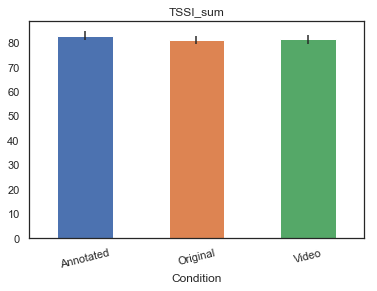

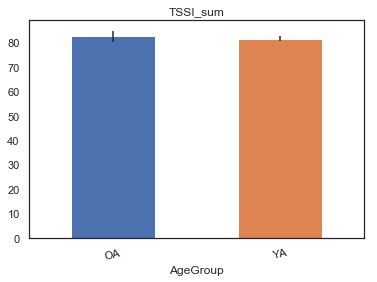

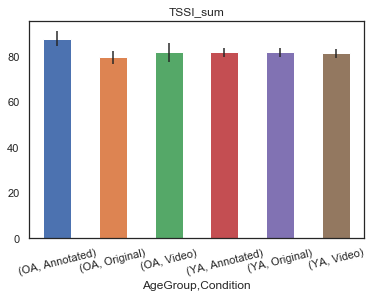

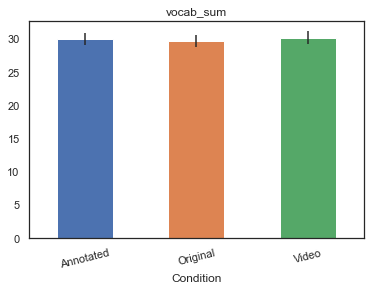

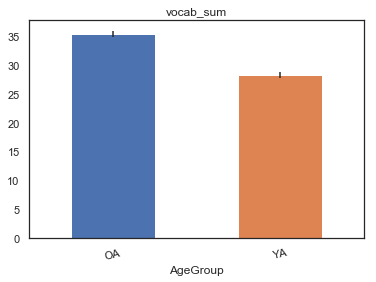

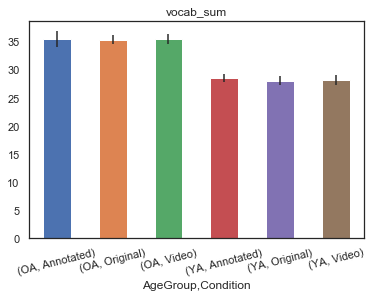

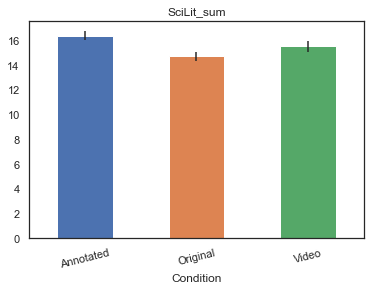

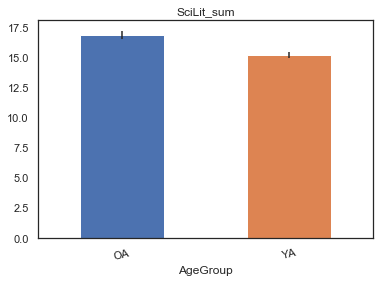

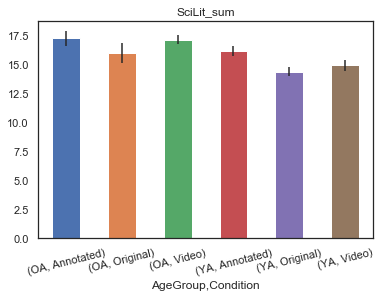

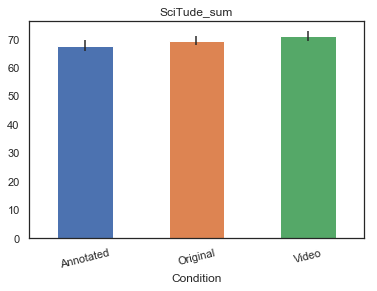

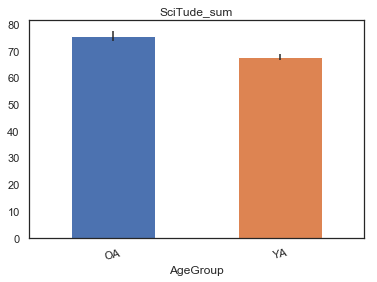

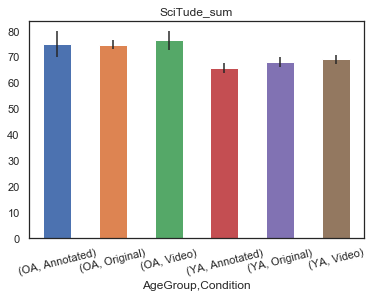

In [31]:
for var in vars_of_interest:
    for grp in grps_of_interest:
        fpath = os.path.join('..','derivatives','figures',var+'_'+''.join(grp)+'.png')
        means = data.groupby(grp).mean()
        sem = data.groupby(grp).sem()
        plot = means.plot.bar(
            y=var,yerr=sem,xticks=np.arange(0,max(data[var]),
                                            step=np.rint(max(data[var])*(1/5))),
            legend=False,title=var,rot=14
        ).get_figure().savefig(fpath, bbox_inches='tight')

# Horizontal Swarm, Strip, Box, Bar plots

..\derivatives\figures\comp_t1_Condition_swarm
..\derivatives\figures\comp_t2_Condition_swarm
..\derivatives\figures\comp_change_Condition_swarm
..\derivatives\figures\nb_CoR_Condition_swarm
..\derivatives\figures\nb_RT_Condition_swarm
..\derivatives\figures\procspd_RT_Condition_swarm
..\derivatives\figures\NFCS_sum_Condition_swarm
..\derivatives\figures\TSSI_sum_Condition_swarm
..\derivatives\figures\vocab_sum_Condition_swarm
..\derivatives\figures\SciLit_sum_Condition_swarm
..\derivatives\figures\SciTude_sum_Condition_swarm
..\derivatives\figures\comp_t1_AgeGroup_swarm
..\derivatives\figures\comp_t2_AgeGroup_swarm
..\derivatives\figures\comp_change_AgeGroup_swarm
..\derivatives\figures\nb_CoR_AgeGroup_swarm
..\derivatives\figures\nb_RT_AgeGroup_swarm
..\derivatives\figures\procspd_RT_AgeGroup_swarm
..\derivatives\figures\NFCS_sum_AgeGroup_swarm
..\derivatives\figures\TSSI_sum_AgeGroup_swarm
..\derivatives\figures\vocab_sum_AgeGroup_swarm
..\derivatives\figures\SciLit_sum_AgeGroup_swa

c:\users\ia406477\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


..\derivatives\figures\comp_t2_Condition_bar
..\derivatives\figures\comp_change_Condition_bar
..\derivatives\figures\nb_CoR_Condition_bar
..\derivatives\figures\nb_RT_Condition_bar
..\derivatives\figures\procspd_RT_Condition_bar
..\derivatives\figures\NFCS_sum_Condition_bar
..\derivatives\figures\TSSI_sum_Condition_bar
..\derivatives\figures\vocab_sum_Condition_bar
..\derivatives\figures\SciLit_sum_Condition_bar
..\derivatives\figures\SciTude_sum_Condition_bar
..\derivatives\figures\comp_t1_AgeGroup_bar
..\derivatives\figures\comp_t2_AgeGroup_bar
..\derivatives\figures\comp_change_AgeGroup_bar
..\derivatives\figures\nb_CoR_AgeGroup_bar
..\derivatives\figures\nb_RT_AgeGroup_bar
..\derivatives\figures\procspd_RT_AgeGroup_bar
..\derivatives\figures\NFCS_sum_AgeGroup_bar
..\derivatives\figures\TSSI_sum_AgeGroup_bar
..\derivatives\figures\vocab_sum_AgeGroup_bar
..\derivatives\figures\SciLit_sum_AgeGroup_bar
..\derivatives\figures\SciTude_sum_AgeGroup_bar
..\derivatives\figures\comp_t1_AgeGr

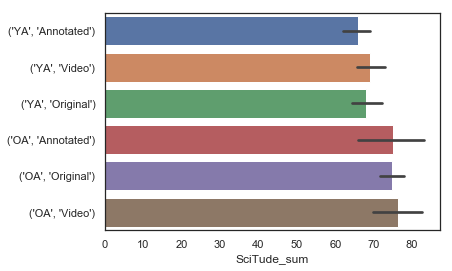

In [32]:
plots_dict = {'swarm':sns.swarmplot,
              'strip':sns.stripplot,
              'box':sns.boxplot,
              'bar':sns.barplot}

for plot in plots_dict.keys():
    for grp in grps_of_interest:
        for var in vars_of_interest:
            try: fig.clear()
            except AttributeError as e: fig=None
            
            fname = var+'_'+''.join(grp)+'_'+plot
            fpath = os.path.join('..','derivatives','figures',fname)
            print(fpath)
            
            df = data.set_index(grp)
            fig = plots_dict[plot](x=var, y=df.index, data=df)
            fig.get_figure().savefig(fpath, bbox_inches='tight')